In [1]:
import sys
from simple_adic_graph import *
from adic_graph import *

%matplotlib inline

In [2]:
cherryblossompink = (1.0, 0.72, 0.77)
lavenderblue = (0.8, 0.8, 1.0)
darkpastelblue = (0.47, 0.62, 0.8)
limegreen = (0.2, 0.8, 0.2)
yellow = (1.0, 1.0, 0.0)
harlequin = (0.25, 1.0, 0.0)

In [3]:
def visualize(graph, pos=None, node_size=350, edge_size=14, edge_label=True, undirected=True, font_size=12):
        
    if pos == None:
        n_nodes = graph.n_nodes
        
        if n_nodes%2 == 0:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}
        else:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

    #ax = plt.figure(figsize=(3*graph.length,3))
    length = graph.length
    fig = plt.figure(figsize=(3*length + 1*(length-1), 3))
    grid = plt.GridSpec(1, 3*length + length-1)
    counter = 0
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 2.5,
    }
        
    for t in range(graph.length):
        #plt.subplot(1, graph.length, t+1)
        ax = fig.add_subplot(grid[0, counter:counter+3])
        
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
            
        for i in range(graph.n_nodes):
            G.add_node(str(i))
                
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):
                    #if i > j:
                    if True:
                        if graph.w_list[t][i,j] != 0:
                            if graph.w_list[t][i,j] == -1:
                                G.add_edge(str(i), str(j), color=cherryblossompink, style="solid")
                            
                            if graph.w_list[t][i,j] == -2:
                                G.add_edge(str(i), str(j), color=darkpastelblue, style="solid")

                            if graph.w_list[t][i,j] == -3:
                                G.add_edge(str(i), str(j), color=harlequin, style="solid")

                            if graph.w_list[t][i,j] == -4:
                                G.add_edge(str(i), str(j), color=limegreen, style="solid")

                            if graph.w_list[t][i,j] == -5:
                                G.add_edge(str(i), str(j), color=lavenderblue, style="solid")
                            
                            if graph.w_list[t][i,j] == -6:
                                G.add_edge(str(i), str(j), color="black", style="solid")
                            
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        
        edge_color = [edge["color"] for edge in G.edges.values()]
        edge_style = [edge["style"] for edge in G.edges.values()]
        
        nx.draw(G, pos=pos, labels={str(i) : str(i+1) for i in range(graph.n_nodes)}, style=edge_style, edge_color=edge_color, **options)
        
        if t != length-1:
            ax_arrow = fig.add_subplot(grid[0, counter+3:counter+4])
            
            #ax_arrow.plot([0, 1, 2], [2,3,4])
            ax_arrow.annotate("", xy=(1.0, 0), xytext=(0, 0), arrowprops=dict(facecolor='black',arrowstyle='-|>,head_width=0.75, head_length=0.75',lw=4))
            plt.ylim(-1, 1)
            plt.axis("off")
            counter += 4
            
            
        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                font_size=edge_size)

# 2-peer Simple ADIC

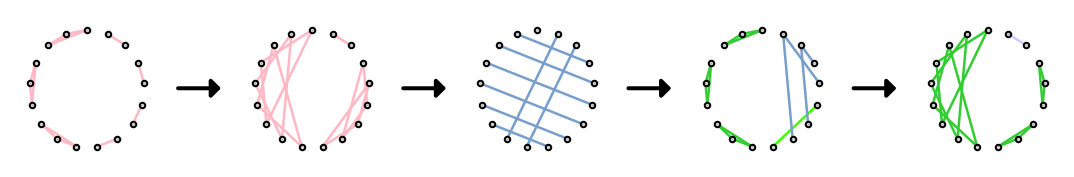

In [17]:
n_nodes = 17
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos, node_size=30, font_size=0)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)